In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# load in the dataset into a pandas dataframe, see the shape
df_fluor = pd.read_csv('C:\\Users\\raz37388\\Desktop\\Fluor Dataset\\A5ME_MTO_.csv',encoding='windows-1252')
df_fluor.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(70278, 57)

In [3]:
df_fluor.head(3)

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
0,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311010,01,4.0,MMX-2311010-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
1,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311013,01,2.0,MMR-2311013-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
2,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311036,01,2.0,MMX-2311036-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2


In [4]:
df_fluor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70278 entries, 0 to 70277
Data columns (total 57 columns):
ASSEMBLY_TYPE             70278 non-null object
PROJECT_NUMBER            70278 non-null object
PROJECT_NAME              70278 non-null object
OFFICE                    70278 non-null object
BOM_DRAWING_NUMBER        70278 non-null object
BOM_SHEET_NUMBER          63734 non-null object
BOM_REV_NUMBER            48169 non-null float64
BOM_NUMBER                70278 non-null object
PRIME_ID                  70278 non-null int64
STAGE                     70278 non-null object
PID                       20 non-null object
WBS                       70278 non-null object
WBS_DESCRIPTION           70278 non-null object
AREA                      70278 non-null int64
UNIT                      70278 non-null int64
LINE_CLASS                54138 non-null object
DESTINATION_ID            70278 non-null object
BOM_ID                    70278 non-null int64
MATL_ID                   70278 n

In [5]:
#Find duplicates in the dataset
df_fluor[df_fluor.duplicated()]

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
2507,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2301-65-001,NaN,0.0,A5ME-2301-65-001,6,F,...,603500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<as req'd>
2539,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2302-65-202,NaN,0.0,A5ME-2302-65-202,6,F,...,603500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<as req'd>
2543,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2303-65-204,NaN,0.0,A5ME-2303-65-204,6,F,...,603500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<as req'd>
2550,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2303-65-205,NaN,0.0,A5ME-2303-65-205,6,F,...,603500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<as req'd>
2557,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2303-65-209,NaN,0.0,A5ME-2303-65-209,6,F,...,603500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<as req'd>
3632,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2300-65-025,NaN,0.0,A5ME-2300-65-025,6,F,...,603000.0,NaN,8001992.0,NaN,NaN,Other materials,NaN,NaN,NaN,<M8>
3644,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2301-65-001,NaN,0.0,A5ME-2301-65-001,6,F,...,603000.0,NaN,8001992.0,NaN,NaN,Other materials,NaN,NaN,NaN,<M8>
3650,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2301-65-115,NaN,0.0,A5ME-2301-65-115,6,F,...,603000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<No Size>
3653,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2302-65-003,NaN,0.0,A5ME-2302-65-003,6,F,...,603000.0,NaN,8001992.0,NaN,NaN,Other materials,NaN,NaN,NaN,<M8>
3658,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,A5ME-2302-65-004,NaN,0.0,A5ME-2302-65-004,6,F,...,603000.0,NaN,8001992.0,NaN,NaN,Other materials,NaN,NaN,NaN,<M8>


In [6]:
#dropping the duplicate 
df_fluor.drop_duplicates(inplace=True)

In [7]:
df_fluor.duplicated().any()

False

In [8]:
#Finding the null values
df_fluor.isnull().sum()

ASSEMBLY_TYPE                 0
PROJECT_NUMBER                0
PROJECT_NAME                  0
OFFICE                        0
BOM_DRAWING_NUMBER            0
BOM_SHEET_NUMBER           6325
BOM_REV_NUMBER            22109
BOM_NUMBER                    0
PRIME_ID                      0
STAGE                         0
PID                       70039
WBS                           0
WBS_DESCRIPTION               0
AREA                          0
UNIT                          0
LINE_CLASS                15921
DESTINATION_ID                0
BOM_ID                        0
MATL_ID                       0
FAB_CLASS                     0
SEQUENCE                      0
QTY_REQUIRED                  0
ITEM_CODE                     0
CATALOG_ABBREV_DESCR          0
MATL_TYPE                     0
UOM                           0
SIZE_1                        0
SIZE_2                        0
SIZE_3                        0
BULK_SIZE                     0
UOM_SIZE_1                  833
UOM_SIZE

In [9]:
#Finding the null values
df_fluor.isnull().any()

ASSEMBLY_TYPE             False
PROJECT_NUMBER            False
PROJECT_NAME              False
OFFICE                    False
BOM_DRAWING_NUMBER        False
BOM_SHEET_NUMBER           True
BOM_REV_NUMBER             True
BOM_NUMBER                False
PRIME_ID                  False
STAGE                     False
PID                        True
WBS                       False
WBS_DESCRIPTION           False
AREA                      False
UNIT                      False
LINE_CLASS                 True
DESTINATION_ID            False
BOM_ID                    False
MATL_ID                   False
FAB_CLASS                 False
SEQUENCE                  False
QTY_REQUIRED              False
ITEM_CODE                 False
CATALOG_ABBREV_DESCR      False
MATL_TYPE                 False
UOM                       False
SIZE_1                    False
SIZE_2                    False
SIZE_3                    False
BULK_SIZE                 False
UOM_SIZE_1                 True
UOM_SIZE

In [10]:
df_fluor['SIZE_1'].value_counts().sum(), df_fluor['SIZE_2'].value_counts().sum(), df_fluor['SIZE_3'].value_counts().sum()

(70059, 70059, 70059)

In [11]:
df_fluor['SIZE_1'].shape

(70059,)

In [12]:
df_fluor.WEIGHT_UOM.unique()

array(['KG', 'LB', nan], dtype=object)

In [13]:
df_fluor.MATL_CODE_PRNT.unique()

array(['Stainless Steels', 'Bolting materials', nan, 'Carbon Steels',
       'Low and Intermediate Alloy Steels',
       'Proprietary Gasket Materials', 'Gasket materials', 'Undefined',
       'Irons'], dtype=object)

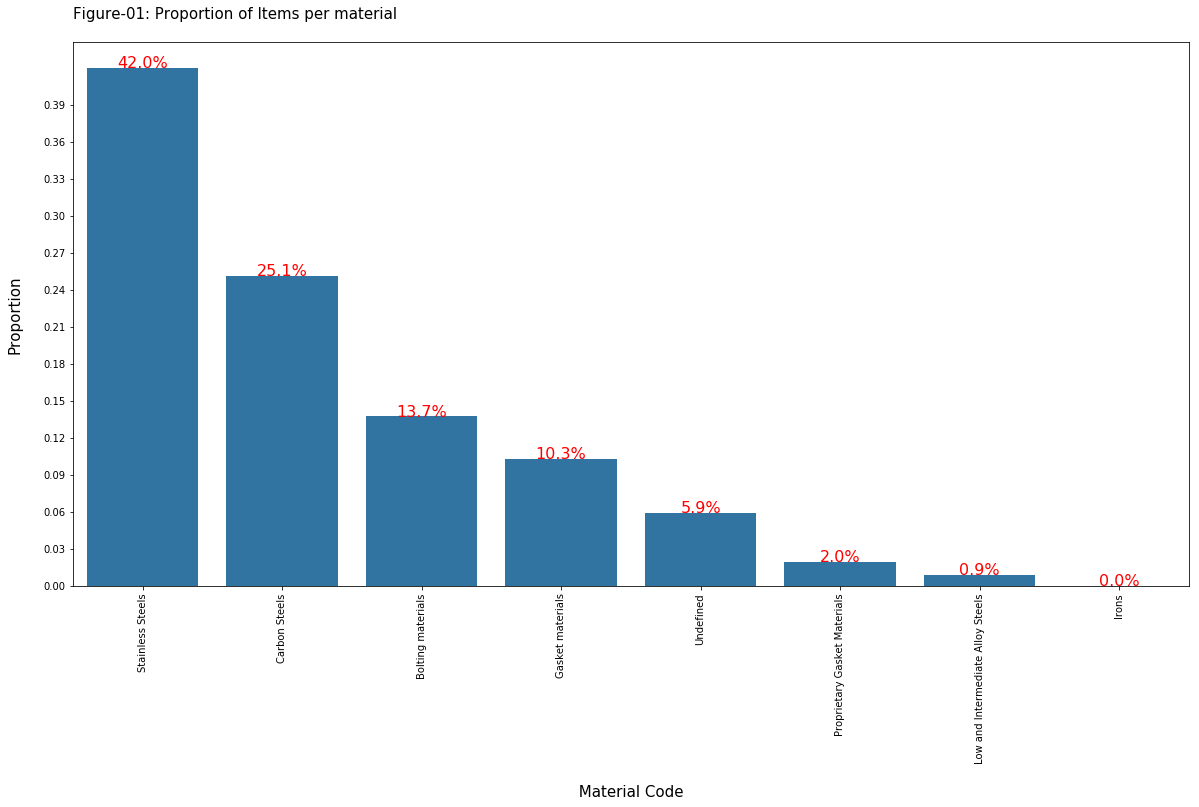

In [14]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[1]
n_points = df_fluor['MATL_CODE_PRNT'].value_counts().sum()
max_count = df_fluor['MATL_CODE_PRNT'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_fluor, x = df_fluor['MATL_CODE_PRNT'], color = base_color, order = df_fluor['MATL_CODE_PRNT'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Material Code ",fontsize=15)
plt.ylabel("Proportion\n",fontsize=15)
plt.title('Figure-01: Proportion of Items per material \n',fontsize=15, loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xticks(rotation=90);

# add annotations
cat_counts = df_fluor['MATL_CODE_PRNT'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [15]:
df_fluor.AREA.unique()

array([11, 12, 50,  0, 99, 23, 20], dtype=int64)

In [16]:
df_area_0 = df_fluor.query('AREA==0')
df_area_11 = df_fluor.query('AREA==11')
df_area_12 = df_fluor.query('AREA==12')
df_area_20 = df_fluor.query('AREA==20')
df_area_50 = df_fluor.query('AREA==50')
df_area_99 = df_fluor.query('AREA==99')

Text(0.5,0,'Area')

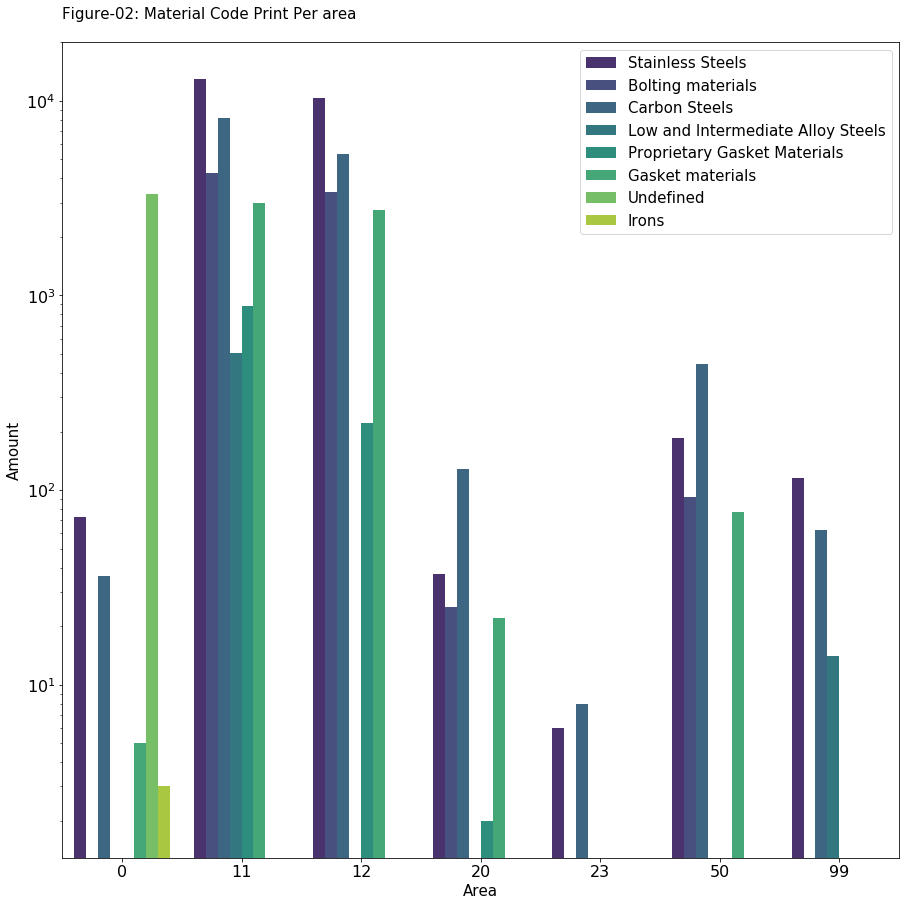

In [47]:
plt.figure(figsize = [15, 15])
sns.countplot(data = df_fluor, x = 'AREA', hue = 'MATL_CODE_PRNT', palette = 'viridis')
plt.xlabel("Area",fontsize=15)
plt.ylabel("Quantity",fontsize=15)
plt.title("Figure-02: Material Code Print Per area\n",fontsize=15,loc="left")
plt.legend(loc=1,prop={'size':15})
plt.yscale('log')
plt.ylabel("Amount", fontsize=15)
plt.xlabel("Area",fontsize=15)

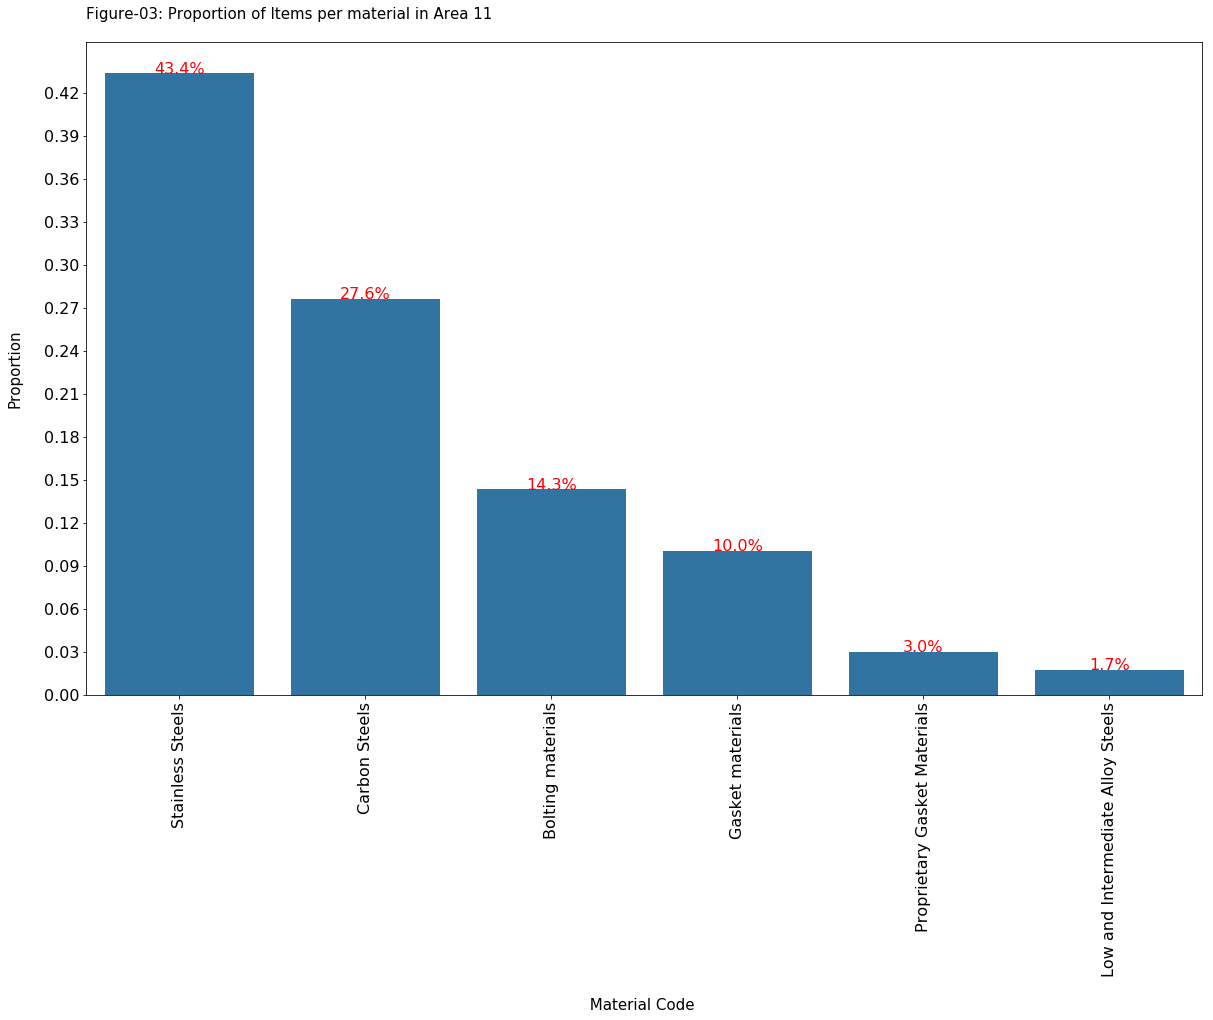

In [18]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [20,12])
base_color = sns.color_palette()[1]
n_points = df_area_11['MATL_CODE_PRNT'].value_counts().sum()
max_count = df_area_11['MATL_CODE_PRNT'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_area_0, x = df_area_11['MATL_CODE_PRNT'], color = base_color, order = df_area_11['MATL_CODE_PRNT'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Material Code  ",fontsize=15)
plt.ylabel("Proportion\n",fontsize=15)
plt.title('Figure-03: Proportion of Items per material in Area 11 \n',fontsize=15, loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.xticks(rotation=90);

# add annotations
cat_counts = df_area_11['MATL_CODE_PRNT'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

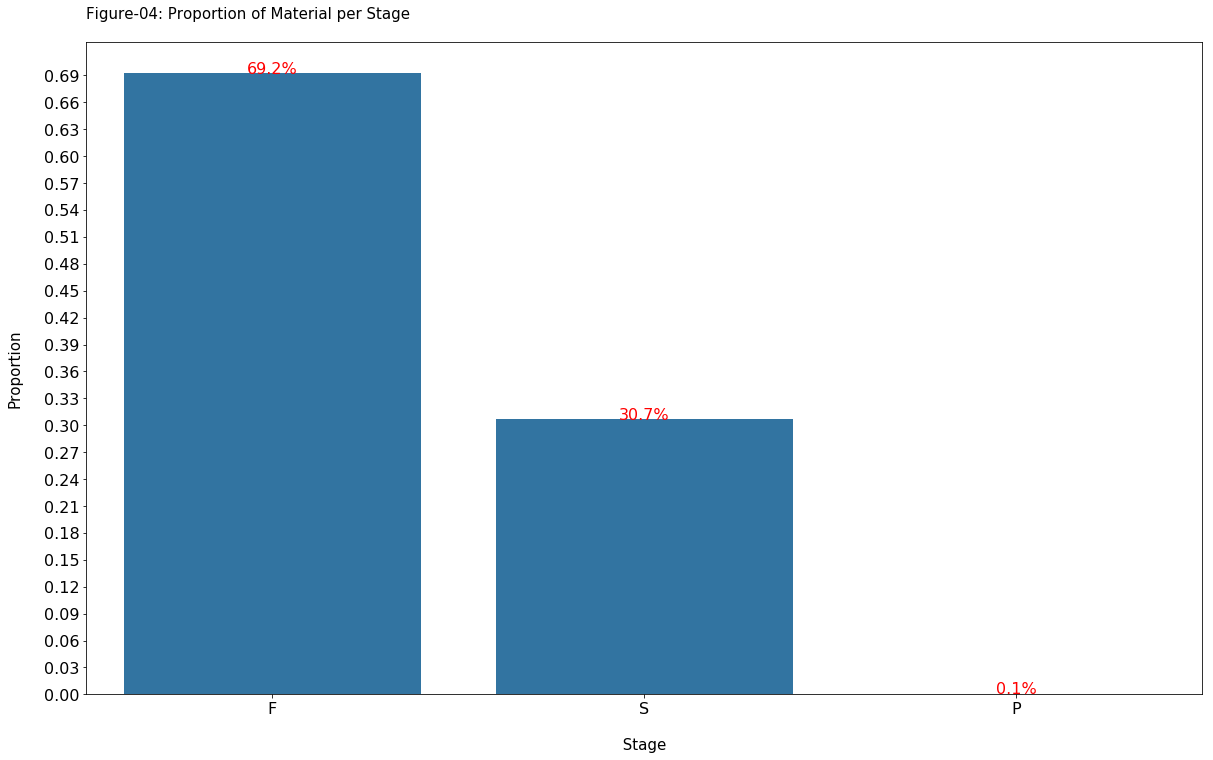

In [19]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [20, 12])
base_color = sns.color_palette()[1]
n_points = df_fluor['STAGE'].value_counts().sum()
max_count = df_fluor['STAGE'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_fluor, x = df_fluor['STAGE'], color = base_color, order = df_fluor['STAGE'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Stage ",fontsize=15)
plt.ylabel("Proportion\n",fontsize=15)
plt.title('Figure-04: Proportion of Material per Stage \n',fontsize=15, loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


# add annotations
cat_counts = df_fluor['STAGE'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [20]:
df_fluor.UOM_SIZE_1.unique() 

array(['IN', nan, 'EA', 'MM', 'A', 'FT'], dtype=object)

In [21]:
df_fluor.UOM_SIZE_2.unique() 

array(['IN', nan, 'EA', 'MM', 'DEG', 'FT', 'A'], dtype=object)

In [22]:
df_fluor.UOM_SIZE_3.unique() 

array(['IN', nan, 'EA', 'MM', 'FT'], dtype=object)

In [23]:
df_pipe_inch = df_fluor.query('EST_CATEGORY== "Pipe" & UOM_SIZE_1 == "IN" & UOM_SIZE_2 == "IN" & UOM_SIZE_3== "IN" ')
df_pipe_EA = df_fluor.query('EST_CATEGORY== "Pipe" & UOM_SIZE_1 == "EA" & UOM_SIZE_2 == "EA" & UOM_SIZE_3== "EA" ')
df_pipe_MM = df_fluor.query('EST_CATEGORY== "Pipe" & UOM_SIZE_1 == "MM" & UOM_SIZE_2 == "MM" & UOM_SIZE_3== "MM" ')
df_pipe_A = df_fluor.query('EST_CATEGORY== "Pipe" & UOM_SIZE_1 == "A" & UOM_SIZE_2 == "A" & UOM_SIZE_3== "A"')
df_pipe_A = df_fluor.query('EST_CATEGORY== "DEG" & UOM_SIZE_1 == "A" & UOM_SIZE_2 == "DEG" & UOM_SIZE_3== "DEG"')

In [24]:
df_fluor['UOM_SIZE_1'].unique()

array(['IN', nan, 'EA', 'MM', 'A', 'FT'], dtype=object)

In [25]:
df_pipe_inch.head(3)

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
0,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311010,01,4.0,MMX-2311010-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
1,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311013,01,2.0,MMR-2311013-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
2,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311036,01,2.0,MMX-2311036-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2


In [26]:
np.percentile(df_pipe_inch.SIZE_1, 90)

8.0

Text(0.5,0,'SIZE_1\n')

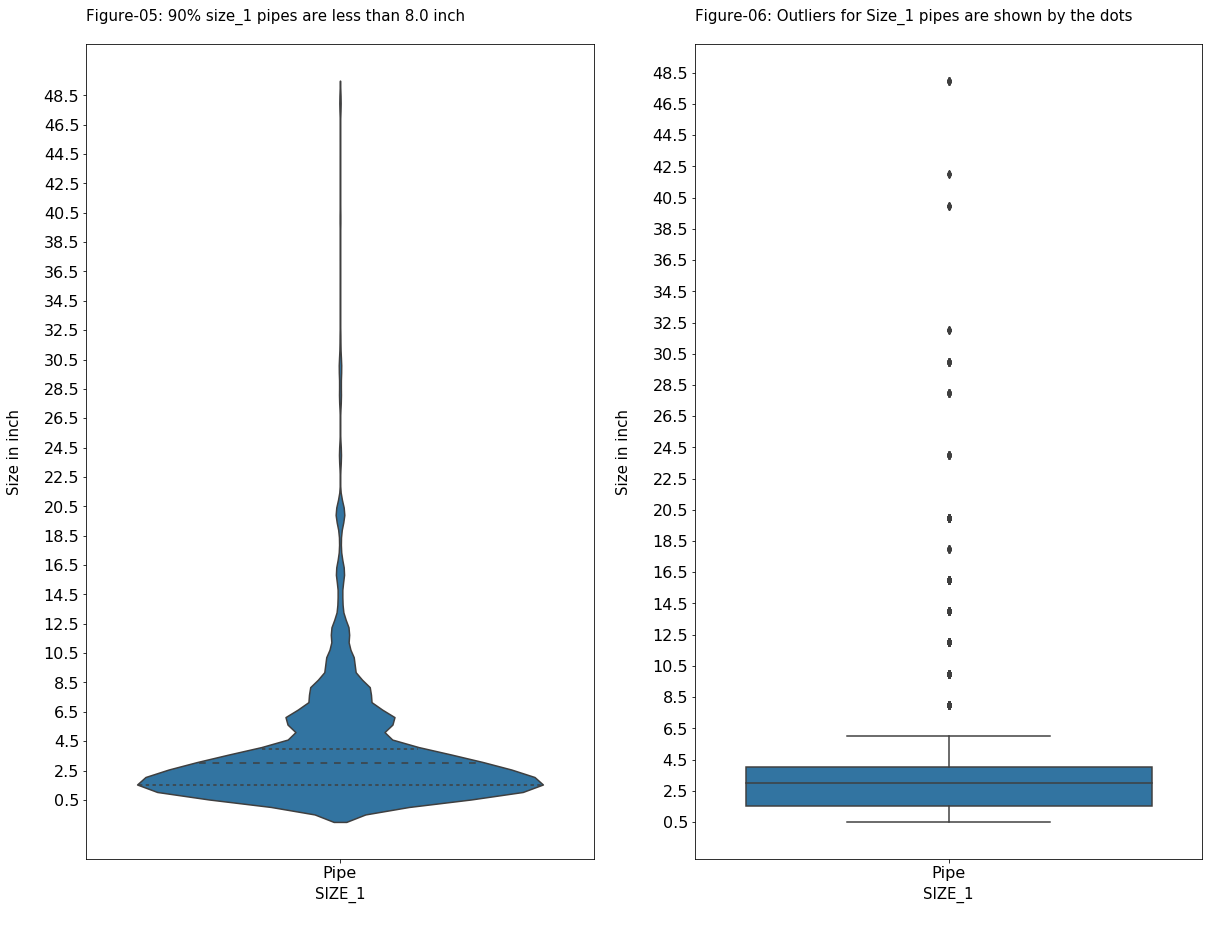

In [42]:
# left plot: violin plot
plt.figure(figsize = [20, 15])
plt.subplot(1, 2, 1)
sns.violinplot(data = df_pipe_inch, x = 'EST_CATEGORY', y = 'SIZE_1', color = base_color, inner = 'quartile')
plt.title('Figure-05: 90% size_1 pipes are less than 8.0 inch\n',fontsize=15,loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.ylabel("Size in inch\n",fontsize=15)
plt.yticks(np.arange(min(df_pipe_inch['SIZE_1']), max(df_pipe_inch['SIZE_1']+1), 2.0))
plt.xlabel("SIZE_1\n",fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(data = df_pipe_inch, x = 'EST_CATEGORY', y = 'SIZE_1', color = base_color)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.title('Figure-06: Outliers for Size_1 pipes are shown by the dots\n',fontsize=15,loc="left")
plt.ylabel("Size in inch\n",fontsize=15)
plt.yticks(np.arange(min(df_pipe_inch['SIZE_1']), max(df_pipe_inch['SIZE_1'])+1, 2.0))
plt.xlabel("SIZE_1\n",fontsize=15)



In [28]:
df_fluor.WEIGHT_UOM.unique()

array(['KG', 'LB', nan], dtype=object)

In [29]:
df_fluor_kg = df_fluor.query('WEIGHT_UOM == "KG"')

In [30]:
df_fluor_lb = df_fluor.query('WEIGHT_UOM == "LB"')

In [31]:
def finding_bore_size (x):
    if x <2:
        return 'small_bore'
    else:
        return 'large_bore'
    

In [32]:
df_pipe_inch['bore_size_1'] = df_pipe_inch['SIZE_1'].apply(finding_bore_size)
df_pipe_inch['bore_size_2'] = df_pipe_inch['SIZE_2'].apply(finding_bore_size)
df_pipe_inch['bore_size_3'] = df_pipe_inch['SIZE_3'].apply(finding_bore_size)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

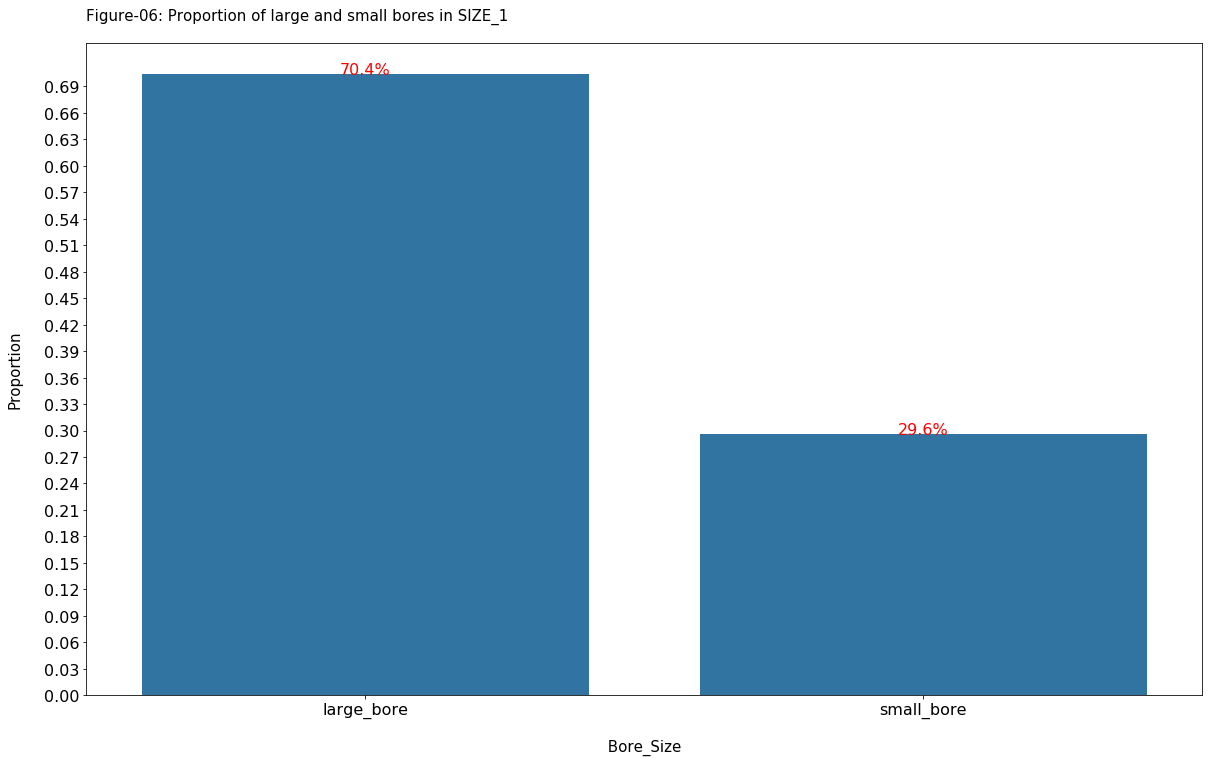

In [33]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [20, 12])
base_color = sns.color_palette()[1]
n_points = df_pipe_inch['bore_size_1'].value_counts().sum()
max_count = df_pipe_inch['bore_size_1'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_fluor, x = df_pipe_inch['bore_size_1'], color = base_color, order = df_pipe_inch['bore_size_1'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Bore_Size ",fontsize=15)
plt.ylabel("Proportion\n",fontsize=15)
plt.title('Figure-06: Proportion of large and small bores in SIZE_1 \n',fontsize=15, loc="left")
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)


# add annotations
cat_counts = df_pipe_inch['bore_size_1'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [39]:
df_area_inch = df_fluor.query('UOM_SIZE_1 == "IN" & UOM_SIZE_2 =="IN" & UOM_SIZE_3 =="IN"')
df_area_inch 

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
0,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311010,01,4.0,MMX-2311010-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
1,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311013,01,2.0,MMR-2311013-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
2,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311036,01,2.0,MMX-2311036-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
3,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311038,01,3.0,MMX-2311038-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
4,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311040,04,0.0,BRR-2311040-04,5,F,...,553500.0,NaN,8002962.0,NaN,NaN,Bolting materials,NaN,NaN,NaN,85
5,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311048,01,2.0,MMR-2311048-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
6,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311048,02,2.0,MMR-2311048-02,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
7,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312001,01,2.0,MMX-2312001-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
8,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312001,02,2.0,MMX-2312001-02,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
9,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312002,01,3.0,MMX-2312002-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2


In [46]:
df_area_inch

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
0,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311010,01,4.0,MMX-2311010-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
1,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311013,01,2.0,MMR-2311013-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
2,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311036,01,2.0,MMX-2311036-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
3,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311038,01,3.0,MMX-2311038-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
4,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311040,04,0.0,BRR-2311040-04,5,F,...,553500.0,NaN,8002962.0,NaN,NaN,Bolting materials,NaN,NaN,NaN,85
5,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311048,01,2.0,MMR-2311048-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
6,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311048,02,2.0,MMR-2311048-02,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
7,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312001,01,2.0,MMX-2312001-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
8,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312001,02,2.0,MMX-2312001-02,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
9,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2312002,01,3.0,MMX-2312002-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2


In [36]:
df_area_boresize['AREA'] =  df_area_boresize.AREA.astype(str)

NameError: name 'df_area_boresize' is not defined

In [37]:
df_area_boresize

NameError: name 'df_area_boresize' is not defined

In [38]:
sns.heatmap(df_area_boresize, annot = True, fmt = '0.0f', color =  sns.color_palette('vlag', 9))

NameError: name 'df_area_boresize' is not defined